# Extracting image data from pdz files 

> Good to know where we took the measurement...

In [ ]:
#|default_exp jpg_extractor 

In [ ]:
#|hide 
import os 
from glob import glob

In [ ]:
#|hide 
# file 14 is the older type 1
pdz_files = glob('/home/frank/Work/DATA/read-pdz-demodata/*.pdz')
list(enumerate(pdz_files))

[(0, '/home/frank/Work/DATA/read-pdz-demodata/00081-Precious Metals 2.pdz'),
 (1, '/home/frank/Work/DATA/read-pdz-demodata/00086-Mudrock Dual.pdz'),
 (2, '/home/frank/Work/DATA/read-pdz-demodata/00067-Spectrum Only.pdz'),
 (3, '/home/frank/Work/DATA/read-pdz-demodata/ANALYZE_EMP-12.pdz'),
 (4, '/home/frank/Work/DATA/read-pdz-demodata/00181-Restricted Materials.pdz'),
 (5, '/home/frank/Work/DATA/read-pdz-demodata/00068-Alloys 2.pdz'),
 (6, '/home/frank/Work/DATA/read-pdz-demodata/00085-Mudrock Dual.pdz'),
 (7, '/home/frank/Work/DATA/read-pdz-demodata/00069-Alloys 2.pdz'),
 (8, '/home/frank/Work/DATA/read-pdz-demodata/2-sky left of left tree.pdz'),
 (9,
  '/home/frank/Work/DATA/read-pdz-demodata/3-brown left edge sample spot.pdz'),
 (10,
  '/home/frank/Work/DATA/read-pdz-demodata/00182-Restricted Materials.pdz'),
 (11, '/home/frank/Work/DATA/read-pdz-demodata/1-sky sample spot.pdz'),
 (12, '/home/frank/Work/DATA/read-pdz-demodata/ANALYZE_EMP-11.pdz'),
 (13, '/home/frank/Work/DATA/read-pd

The newest Bruker Tracer XRF spectrometers are equipped with a simple RGB camera that can record the location of the spectral measurement. This RGB image is then encoded as jpg binary data that is stored within a specific block (type 137) in the pdz file. If a pdz file actually contains image data you can use the `extract_jpg()` function to get it out.    

In [ ]:
from read_pdz import extract_jpg 

In [ ]:
pdz_file = '/home/frank/Work/DATA/read-pdz-demodata/00081-Precious Metals 2.pdz' # contains jpg image 
im = extract_jpg(pdz_file, save_file=True)

Saving image file: '/home/frank/Work/DATA/read-pdz-demodata/00081-Precious Metals 2.jpg'


Let's take a look at the image. Can anyone tell what we see here? 

In [ ]:
#|code-fold: true 
import matplotlib.pyplot as plt  

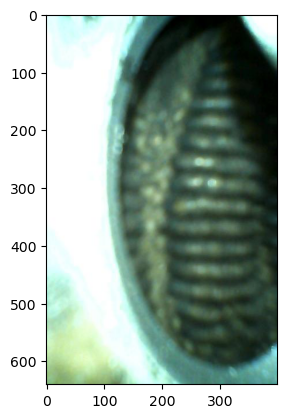

In [ ]:
#|code-fold: true
fig, ax = plt.subplots()
ax.imshow(im);

## FUNCTIONS 

In [ ]:
#|export 

from read_pdz import file_to_bytes, get_blocks, get_blocktypes 
import numpy as np 
import io 
import re
import matplotlib.pyplot as plt 
from PIL import Image

In [ ]:
#|export 

def extract_jpg(pdz_file, BLOCKTYPE=137, save_file=False): 
    '''Extract jpg image from `pdz_file`.'''
    
    # parse into blocks 
    pdz_bytes = file_to_bytes(pdz_file)
    block_list = get_blocks(pdz_bytes, verbose=False)

    # read block 137 (if present)
    blocktypes_list = get_blocktypes(block_list)

    if BLOCKTYPE not in blocktypes_list: 
        print(f'Could not find jpg image data in: {pdz_file}')

    else: 
        jpg_i = blocktypes_list.index(137)
        jpg_dict = block_list[jpg_i]
        jpg_sandwich = jpg_dict['bytes'].tobytes()
    
        jpg_start = re.search(b'\xff\xd8', jpg_sandwich).span()[0]
        jpg_end = re.search(b'\xff\xd9', jpg_sandwich).span()[1]
        jpg = jpg_sandwich[jpg_start:jpg_end]
    
        im = np.array(Image.open(io.BytesIO(jpg))) 

        if save_file is True: 
            jpg_file = re.sub('\.pdz$', '.jpg', pdz_file) 
            print(f"Saving image file: '{jpg_file}'")
            plt.imsave(jpg_file, im) 

        return im 

    return None 